In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier

In [65]:
df=pd.read_csv('data_science_job.csv')
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [66]:
df.shape

(19158, 13)

In [67]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [68]:
df.shape

(19158, 13)

In [69]:
df=df.drop('city',axis=1)

In [70]:
df=df.drop('enrollee_id',axis=1)

In [71]:
df.shape

(19158, 11)

In [72]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [73]:
df.isnull().sum()

city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [74]:
df.shape

(19158, 11)

<Axes: ylabel='training_hours'>

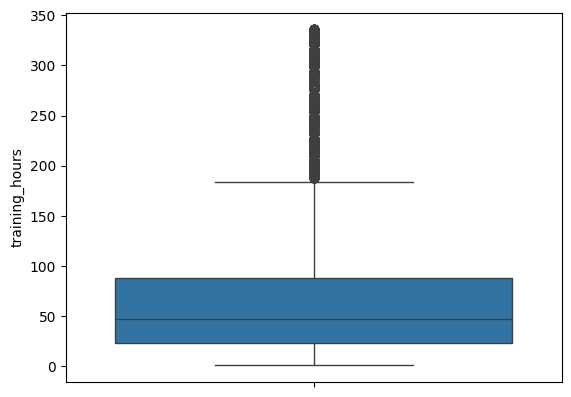

In [75]:
import seaborn as sns
sns.boxplot(df['training_hours'])

In [76]:
q1=df['training_hours'].quantile(0.25)
q3=df['training_hours'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*(iqr)
lower_limit=q1-1.5*(iqr)

In [77]:
df['training_hours']=np.where(df['training_hours']>=upper_limit,upper_limit,df['training_hours'])

<Axes: ylabel='training_hours'>

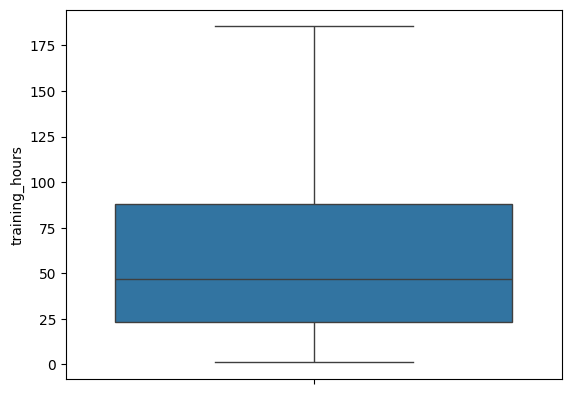

In [78]:
sns.boxplot(df['training_hours'])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:10],df.iloc[:,-1],test_size=0.2,random_state=42)

In [81]:
X_train.sample(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours
12831,0.926,NaN,Has relevent experience,no_enrollment,High School,NaN,2.0,10/49,Pvt Ltd,70.0
18524,0.920,Male,No relevent experience,no_enrollment,Graduate,Other,6.0,10000+,Pvt Ltd,12.0
14105,0.794,Other,Has relevent experience,no_enrollment,High School,NaN,7.0,NaN,NaN,25.0
12508,0.920,Female,No relevent experience,no_enrollment,Graduate,Arts,1.0,NaN,NaN,29.0
5630,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,10/49,Pvt Ltd,NaN
4287,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,4.0,1000-4999,Pvt Ltd,42.0
3168,0.727,Male,No relevent experience,Full time course,Primary School,NaN,7.0,NaN,NaN,22.0
13285,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,2.0,10/49,Pvt Ltd,69.0
8096,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,10000+,Pvt Ltd,23.0
8427,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,15.0


In [82]:
y_train.head()

13330    1.0
18074    0.0
366      0.0
10662    0.0
13974    1.0
Name: target, dtype: float64

In [83]:
# Data Loading and Splitting (Unchanged)

# 1. Custom Mapping Function (Unchanged)
size_mapping = {
    '<10': 1, '10/49': 2, '50-99': 3, '100-500': 4, '500-999': 5,
    '1000-4999': 6, '5000-9999': 7, '10000+': 8, 'Unknown': 0
}
def map_company_size(arr):
    mapper = np.vectorize(lambda x: size_mapping.get(x, 0))
    return mapper(arr).reshape(-1, 1)

company_size_transformer = FunctionTransformer(map_company_size, feature_names_out='one-to-one')

# 2. Define Feature Groups (Based on original column names)
numeric_features = ['city_development_index', 'experience', 'training_hours']
nominal_features = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']
ordinal_features = ['company_size']

# 3. Define Sub-Pipelines (Consolidating imputation, encoding, and scaling)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('mapper', company_size_transformer),
    ('scaler', StandardScaler())
])

# 4. The Single, Robust ColumnTransformer (Replaces trnf1 through trnf7)
# It handles all data cleansing and transformation by name.
trnf_preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipe', numeric_transformer, numeric_features),
        ('ord_pipe', ordinal_transformer, ordinal_features),
        ('nom_pipe', nominal_transformer, nominal_features)
    ],
    remainder='drop'
)

xgb_pipe = make_pipeline(
    trnf_preprocessor, 
    XGBClassifier(n_jobs=-1, eval_metric='logloss', use_label_encoder=False, random_state=42)
)

# Initial Evaluation 
print("--- Initial Evaluation of XGBoost ---")
xgb_scores = cross_val_score(xgb_pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"XGBoost Mean CV Score (Baseline): {np.mean(xgb_scores):.4f}")
print(f"XGBoost Standard Deviation: {np.std(xgb_scores):.4f}")

# 6. HYPERPARAMETER TUNING (To Maximize Accuracy)
param_grid_xgb = {
    # 'xgbclassifier' is the name assigned by make_pipeline
    'xgbclassifier__n_estimators': [100, 200, 300],  # Number of trees
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.2], # Step size shrinkage
    'xgbclassifier__max_depth': [3, 5, 7]       # Depth of the individual tree
}

# Setup and run the Grid Search
xgb_grid_search = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1, # Print progress
    n_jobs=-1
)

print("\n--- Starting Grid Search for Optimal XGBoost Parameters (This will take time) ---")
xgb_grid_search.fit(X_train, y_train)

print("\n--- FINAL MAX ACCURACY ---")
print(f"Best Mean CV Score (Training): {xgb_grid_search.best_score_:.4f}")
print(f"Best Parameters: {xgb_grid_search.best_params_}")

# final trained model
best_xgb_model = xgb_grid_search.best_estimator_

# FINAL TEST SET EVALUATION
from sklearn.metrics import accuracy_score
y_pred_tuned = best_xgb_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"\nFinal Tuned Model Accuracy on Test Set: {final_accuracy:.4f}")


--- Initial Evaluation of XGBoost ---
XGBoost Mean CV Score (Baseline): 0.7852
XGBoost Standard Deviation: 0.0040

--- Starting Grid Search for Optimal XGBoost Parameters (This will take time) ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\lenovo2\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [01:44:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- FINAL MAX ACCURACY ---
Best Mean CV Score (Training): 0.7959
Best Parameters: {'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 300}

Final Tuned Model Accuracy on Test Set: 0.7904


In [84]:
import joblib

# This is the fully optimized pipeline
best_xgb_model = xgb_grid_search.best_estimator_ 

# Save the model to a file named 'job_change_predictor_pipeline.pkl'
joblib.dump(best_xgb_model, 'job_change_predictor_pipeline.pkl')

print("Final XGBoost pipeline saved successfully!")

Final XGBoost pipeline saved successfully!
